<a href="https://colab.research.google.com/github/larinb/USD_Plotter/blob/main/mediadodolar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('/content/Dataset - USD_BRL_hist.csv')

In [ ]:
df.head()

,Data,USD_BRL
0,31.12.2019,4.0195
1,30.12.2019,4.0195
2,27.12.2019,4.0460
3,26.12.2019,4.0560
4,25.12.2019,4.0838


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2608 entries, 0 to 2607
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Data     2608 non-null   object 
 1   USD_BRL  2608 non-null   float64
dtypes: float64(1), object(1)
memory usage: 40.9+ KB


In [ ]:
df['Data'] = pd.to_datetime(df['Data'], dayfirst=True)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2608 entries, 0 to 2607
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Data     2608 non-null   datetime64[ns]
 1   USD_BRL  2608 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 40.9 KB


In [ ]:
df['ANO'] = df['Data'].dt.year

In [ ]:
df.head()

,Data,USD_BRL,ANO
0,2019-12-31,4.0195,2019
1,2019-12-30,4.0195,2019
2,2019-12-27,4.0460,2019
3,2019-12-26,4.0560,2019
4,2019-12-25,4.0838,2019


In [ ]:
df.loc[df.ANO==2019]

,Data,USD_BRL,ANO
0,2019-12-31,4.0195,2019
1,2019-12-30,4.0195,2019
2,2019-12-27,4.0460,2019
3,2019-12-26,4.0560,2019
4,2019-12-25,4.0838,2019
...,...,...,...
256,2019-01-07,3.7356,2019
257,2019-01-04,3.7155,2019
258,2019-01-03,3.7565,2019
259,2019-01-02,3.7900,2019


In [ ]:
import matplotlib.pyplot as plt

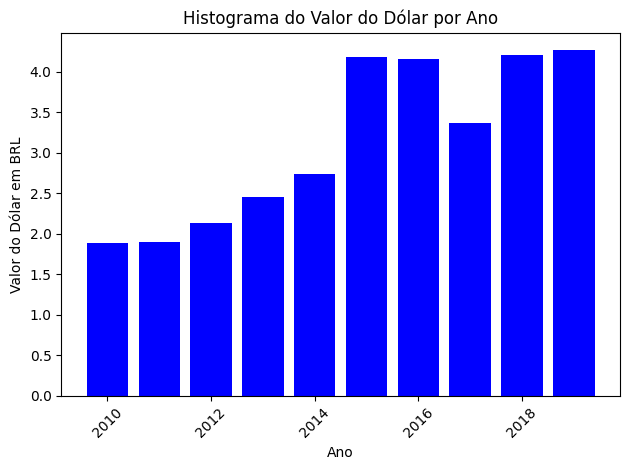

In [ ]:
data = df.sort_values(by='USD_BRL')

plt.bar(df['ANO'], df['USD_BRL'], color='blue')
plt.xlabel('Ano')
plt.ylabel('Valor do Dólar em BRL')
plt.title('Histograma do Valor do Dólar por Ano')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
data['Mês'] = data['Data'].dt.month

In [ ]:
media_por_mes_2019 = data[data['Data'].dt.year == 2019].groupby('Mês')['USD_BRL'].mean()

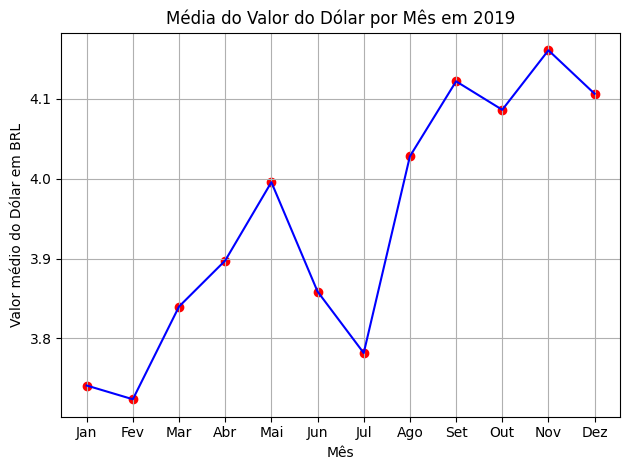

In [ ]:
plt.scatter(media_por_mes_2019.index, media_por_mes_2019.values, color='red', marker='o')
plt.plot(media_por_mes_2019.index, media_por_mes_2019.values, color='blue', linestyle='-')
plt.xlabel('Mês')
plt.ylabel('Valor médio do Dólar em BRL')
plt.title('Média do Valor do Dólar por Mês em 2019')
plt.xticks(range(1, 13), ['Jan', 'Fev', 'Mar', 'Abr', 'Mai', 'Jun', 'Jul', 'Ago', 'Set', 'Out', 'Nov', 'Dez'])
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
valores_novembro = data[(data['Data'] >= '2019-11-10') & (data['Data'] <= '2019-11-20')]
valores_novembro

,Data,USD_BRL,ANO,Mês
36,2019-11-11,4.1518,2019,11
35,2019-11-12,4.1677,2019,11
34,2019-11-13,4.1704,2019,11
30,2019-11-19,4.1945,2019,11
33,2019-11-14,4.1951,2019,11
32,2019-11-15,4.1962,2019,11
29,2019-11-20,4.1965,2019,11
31,2019-11-18,4.2180,2019,11


In [ ]:
df_nov_2019 = df[(df['Data'].dt.year == 2019) & (df['Data'].dt.month == 11)]

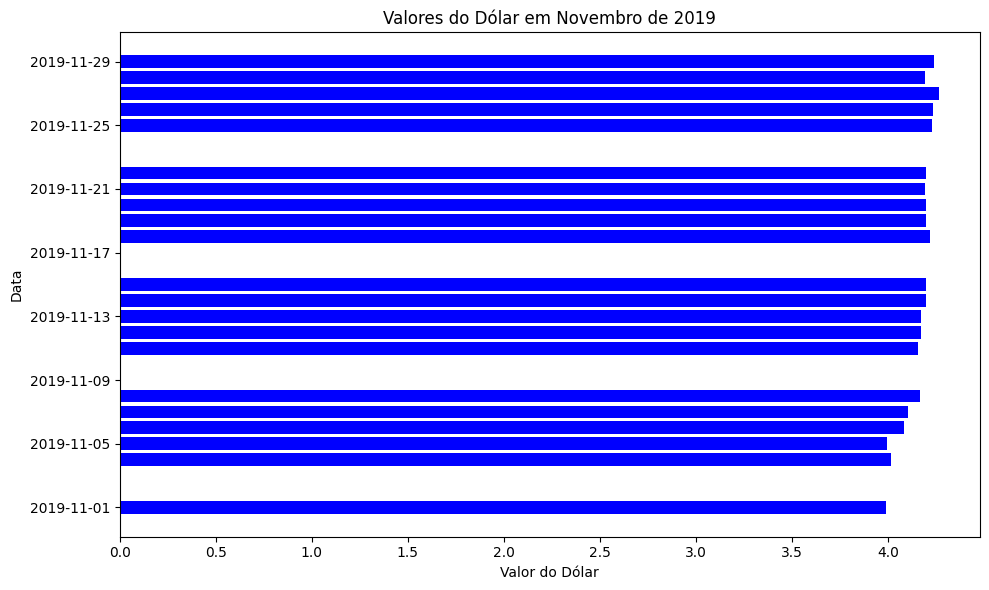

In [ ]:
plt.figure(figsize=(10,6))
plt.barh(df_nov_2019['Data'], df_nov_2019['USD_BRL'], color='blue')
plt.title('Valores do Dólar em Novembro de 2019')
plt.xlabel('Valor do Dólar')
plt.ylabel('Data')
plt.tight_layout()
plt.show()